In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
import cv2
import imutils
import numpy as np
import zipfile
import os
from IPython.display import Image, display
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
PATH = "/content/gdrive/MyDrive/Datasets/"

Github Dataset

In [4]:
with zipfile.ZipFile("/content/gdrive/MyDrive/Datasets/no.zip", 'r') as zip_ref:
    zip_ref.extractall('/content/github_dataset')

In [5]:
with zipfile.ZipFile("/content/gdrive/MyDrive/Datasets/yes.zip", 'r') as zip_ref:
    zip_ref.extractall('/content/github_dataset')

Archivos encontrados: ['no1328.jpg', 'no369.jpg', 'no1317.jpg', 'no113.jpg', 'no411.jpg', 'no359.jpg', 'no1165.jpg', 'no1055.jpg', 'no1133.jpg', 'No12.jpg', 'no114.jpg', 'no1138.jpg', 'no294.jpg', 'no402.jpg', 'no1486.jpg', 'no1188.jpg', 'no383.jpg', 'no1295.jpg', 'no385.jpg', 'no1265.jpg', 'no507.jpg', 'no1436.jpg', 'no1373.jpg', 'no1430.jpg', 'no1387.jpg', 'no1339.jpg', 'no1118.jpg', 'no1426.jpg', 'no1292.jpg', 'no363.jpg', 'no1372.jpg', 'no1084.jpg', 'no259.jpg', 'no434.jpg', 'no1231.jpg', 'no1093.jpg', 'no1143.jpg', 'no1380.jpg', 'no488.jpg', 'no180.jpg', 'no181.jpg', 'no350.jpg', 'no430.jpg', 'no1275.jpg', 'no356.jpg', 'no1092.jpg', 'no1192.jpg', 'no1383.jpg', 'no1144.jpg', 'no1158.jpg', 'no496.jpg', 'no246.jpg', 'no489.jpg', 'no118.jpg', 'no1228.jpg', 'no1130.jpg', 'no508.jpg', 'no266.jpg', 'no1329.jpg', 'no1300.jpg', 'no1097.jpg', 'no1411.jpg', 'no170.jpg', 'no1279.jpg', 'no1459.jpg', 'no1117.jpg', 'no208.jpg', 'no1107.jpg', 'no379.jpg', 'no514.jpg', 'no1037.jpg', 'no415.jpg', '

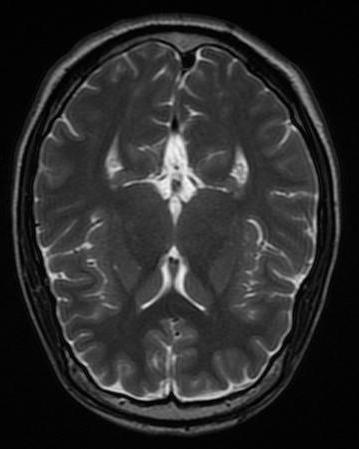

Mostrando: no369.jpg


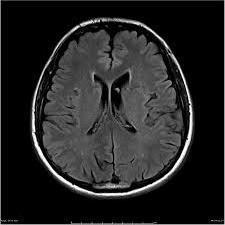

Mostrando: no1317.jpg


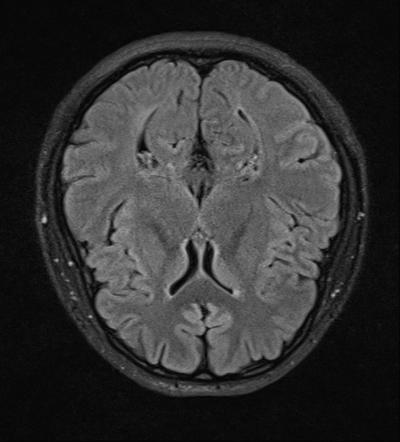

Mostrando: no113.jpg


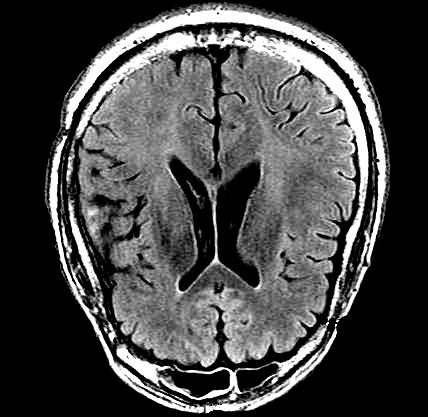

Mostrando: no411.jpg


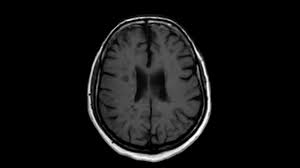

In [6]:
#yes, no, brain_tumor_dataset
folder_path = '/content/github_dataset/no'
files = os.listdir(folder_path)

print("Archivos encontrados:", files)
print(f"cantidad de imagenes: {len(files)}")  # Imprimir los archivos encontrados

count = 0
for file in files:
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        print("Mostrando:", file)  # Imprimir el nombre del archivo que se va a mostrar
        display(Image(filename=os.path.join(folder_path, file)))
        count += 1
        if count == 5:
            break

if count == 0:
    print("No se encontraron imágenes para mostrar.")

Archivos encontrados: ['y1204.jpg', 'y1275.jpg', 'y455.jpg', 'y1147.jpg', 'y194.jpg', 'y1024.jpg', 'y1379.jpg', 'y1261.jpg', 'y130.jpg', 'y1229.jpg', 'y320.jpg', 'y1175.jpg', 'y412.jpg', 'y255.jpg', 'y176.jpg', 'y284.jpg', 'y483.jpg', 'y499.jpg', 'y171.jpg', 'y207.jpg', 'y333.jpg', 'y167.jpg', 'y1326.jpg', 'y1255.jpg', 'y1487.jpg', 'y127.jpg', 'y1384.jpg', 'y1392.jpg', 'y1142.jpg', 'y190.jpg', 'y287.jpg', 'y1371.jpg', 'y1205.jpg', 'y355.jpg', 'y494.jpg', 'y267.jpg', 'y431.jpg', 'y1179.jpg', 'y1269.jpg', 'y181.jpg', 'y476.jpg', 'y425.jpg', 'y10.jpg', 'y1427.jpg', 'y1339.jpg', 'y1399.jpg', 'y1320.jpg', 'y1081.jpg', 'y142.jpg', 'y148.jpg', 'y397.jpg', 'y237.jpg', 'y1251.jpg', 'y1102.jpg', 'y184.jpg', 'y1218.jpg', 'y514.jpg', 'y1435.jpg', 'y1496.jpg', 'y168.jpg', 'y115.jpg', 'y1350.jpg', 'y403.jpg', 'y182.jpg', 'y434.jpg', 'y175.jpg', 'y27.jpg', 'y373.jpg', 'y365.jpg', 'y244.jpg', 'y122.jpg', 'y1125.jpg', 'y268.jpg', 'y473.jpg', 'y249.jpg', 'y1019.jpg', 'y506.jpg', 'y1158.jpg', 'y422.jpg',

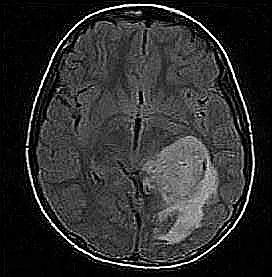

Mostrando: y1275.jpg


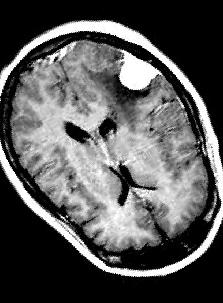

Mostrando: y455.jpg


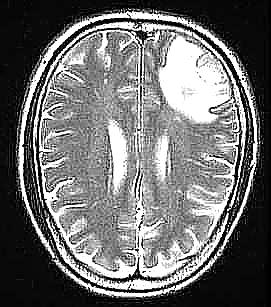

Mostrando: y1147.jpg


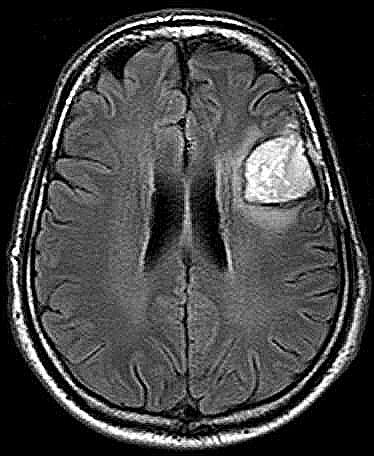

Mostrando: y194.jpg


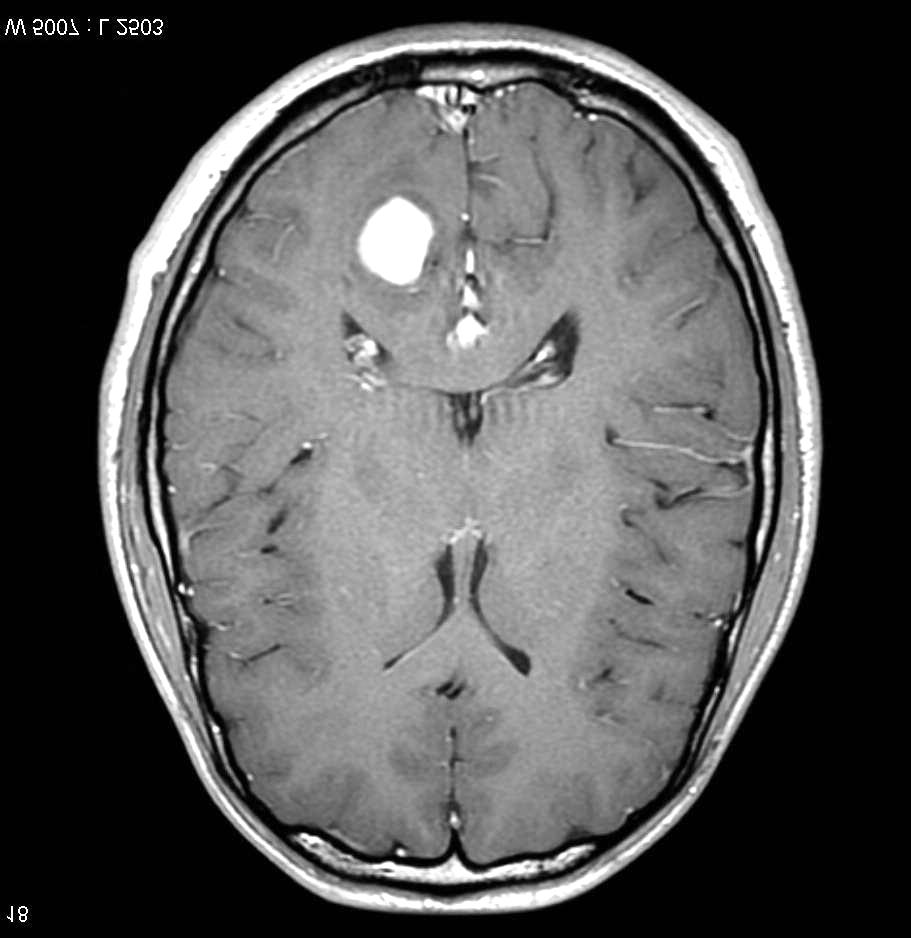

In [7]:
#yes, no, brain_tumor_dataset
folder_path = '/content/github_dataset/yes'
files = os.listdir(folder_path)

print("Archivos encontrados:", files)
print(f"cantidad de imagenes: {len(files)}")  # Imprimir los archivos encontrados

count = 0
for file in files:
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        print("Mostrando:", file)  # Imprimir el nombre del archivo que se va a mostrar
        display(Image(filename=os.path.join(folder_path, file)))
        count += 1
        if count == 5:
            break

if count == 0:
    print("No se encontraron imágenes para mostrar.")

Github Dataset

In [8]:
github_path = '/content/github_dataset'

In [10]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

In [12]:
from IPython.display import clear_output
!apt-get install tree
clear_output()
# create new folders
!mkdir TRAIN TEST TRAIN/YES TRAIN/NO TEST/YES TEST/NO
!tree -d

.
├── gdrive
│   └── MyDrive
│       ├── Colab Notebooks
│       └── Datasets
│           ├── TEST_CROP
│           │   ├── NO
│           │   └── YES
│           ├── TRAIN_CROP
│           │   ├── NO
│           │   └── YES
│           └── VAL_CROP
│               ├── NO
│               └── YES
├── github_dataset
│   ├── no
│   └── yes
├── sample_data
├── TEST
│   ├── NO
│   └── YES
└── TRAIN
    ├── NO
    └── YES

23 directories


In [15]:
# Ruta del directorio que contiene las imágenes
IMG_PATH = '/content/github_dataset/'

# División de los datos en entrenamiento, validación y prueba
for CLASS in os.listdir(IMG_PATH):
    print(CLASS)
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH + CLASS + '/' + FILE_NAME
            if n < 0.20 * IMG_NUM:  # Primeros 20% para TEST
                shutil.copy(img, 'TEST/' + CLASS.upper() + '/' + FILE_NAME)
            else:  # Siguientes hasta el 100% para TRAIN
                shutil.copy(img, 'TRAIN/'+ CLASS.upper() + '/' + FILE_NAME)


no
yes


In [16]:
from tqdm import tqdm

def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels


In [17]:
TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'
IMG_SIZE = (224,224)

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)

100%|██████████| 2/2 [00:03<00:00,  1.93s/it]
<ipython-input-16-1933a8b41adb>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


1600 images loaded from TRAIN/ directory.


100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

400 images loaded from TEST/ directory.


In [ ]:
labels

{0: 'NO', 1: 'YES'}

In [21]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import matplotlib.pyplot as plt
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

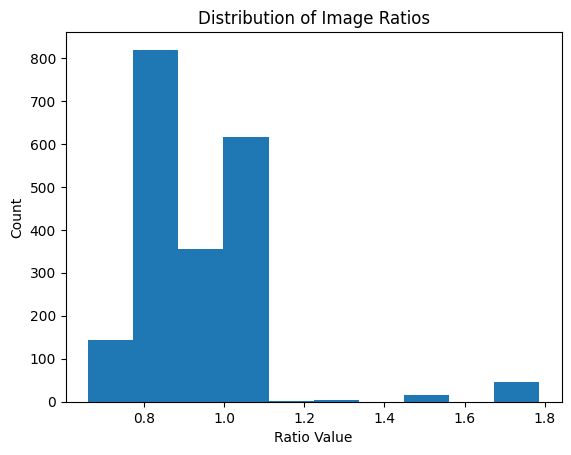

In [22]:
RATIO_LIST = []
for set in (X_train, X_test):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])

plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [23]:
# apply this for each set
X_train_crop = crop_imgs(set_name=X_train)
X_test_crop = crop_imgs(set_name=X_test)

<ipython-input-10-65876982ba26>:31: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [24]:
print(f"cantidad de imagenes: {len(X_train_crop)}")
print(f"cantidad de imagenes: {len(X_test_crop)}")

cantidad de imagenes: 1600
cantidad de imagenes: 400


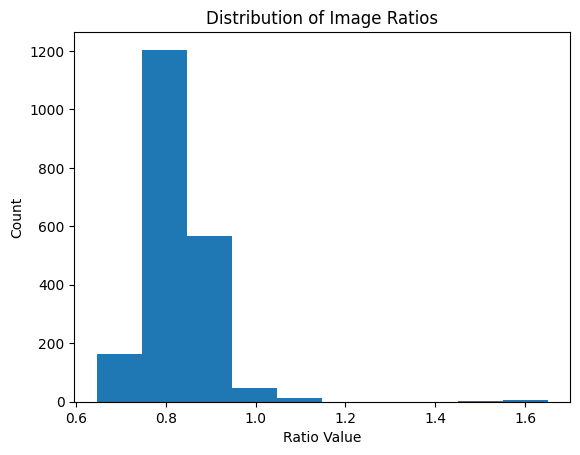

In [25]:
RATIO_LIST2 = []
for set in (X_train_crop, X_test_crop):
    for img in set:
        RATIO_LIST2.append(img.shape[1]/img.shape[0])

plt.hist(RATIO_LIST2)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

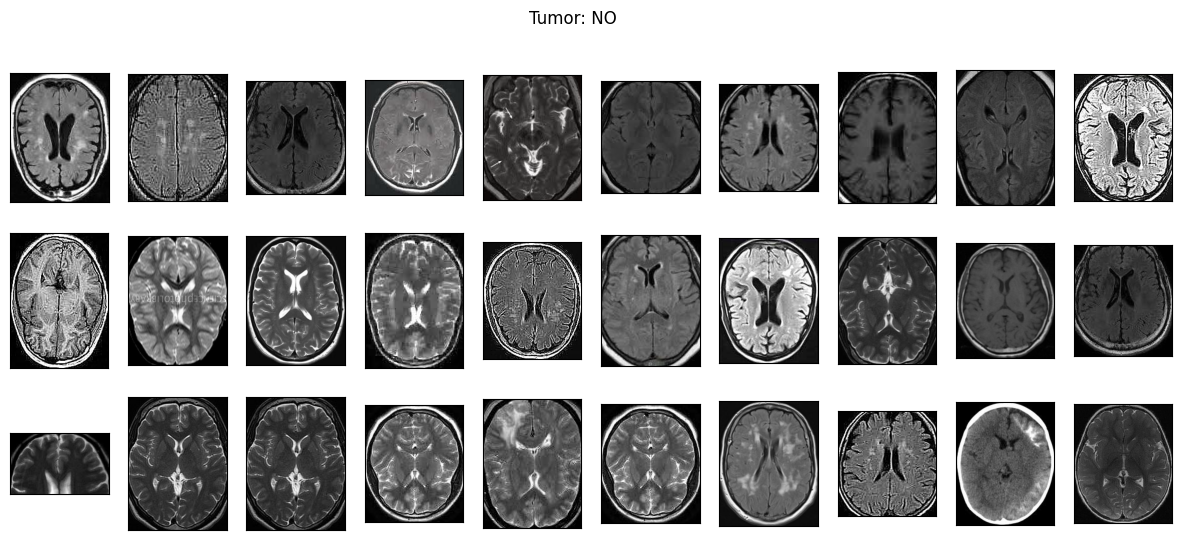

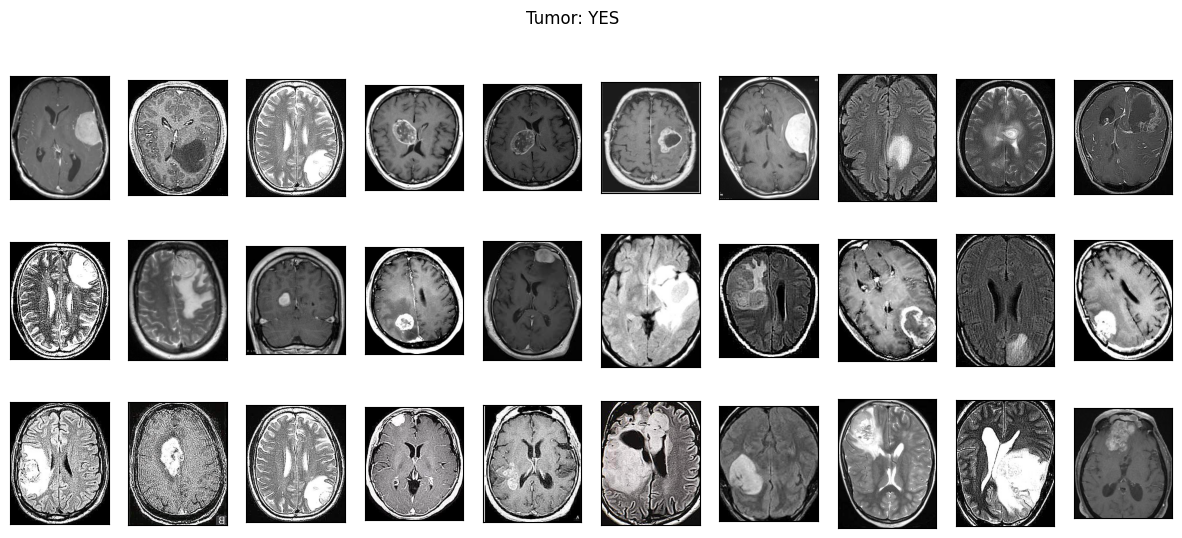

In [26]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

plot_samples(X_train_crop, y_train, labels, 30)

In [27]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [28]:
# saving new images to the folder
!mkdir TRAIN_CROP TEST_CROP TRAIN_CROP/YES TRAIN_CROP/NO TEST_CROP/YES TEST_CROP/NO

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

In [30]:
!cp -r TRAIN_CROP "/content/gdrive/MyDrive/Dataset_yolo/"

In [31]:
!cp -r TEST_CROP "/content/gdrive/MyDrive/Dataset_yolo/"


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

In [ ]:
def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-15 preprocessing
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [ ]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

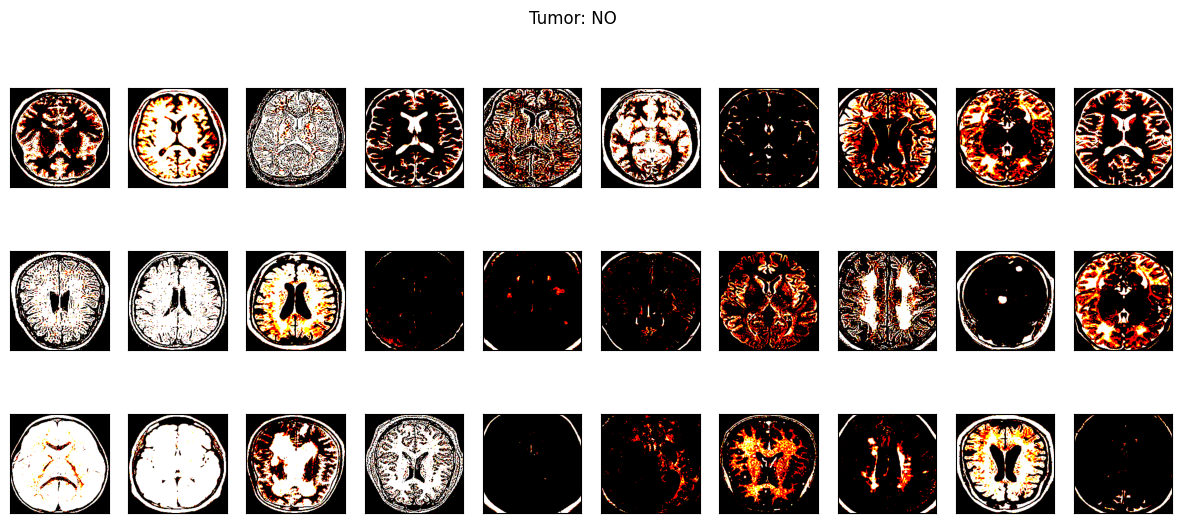

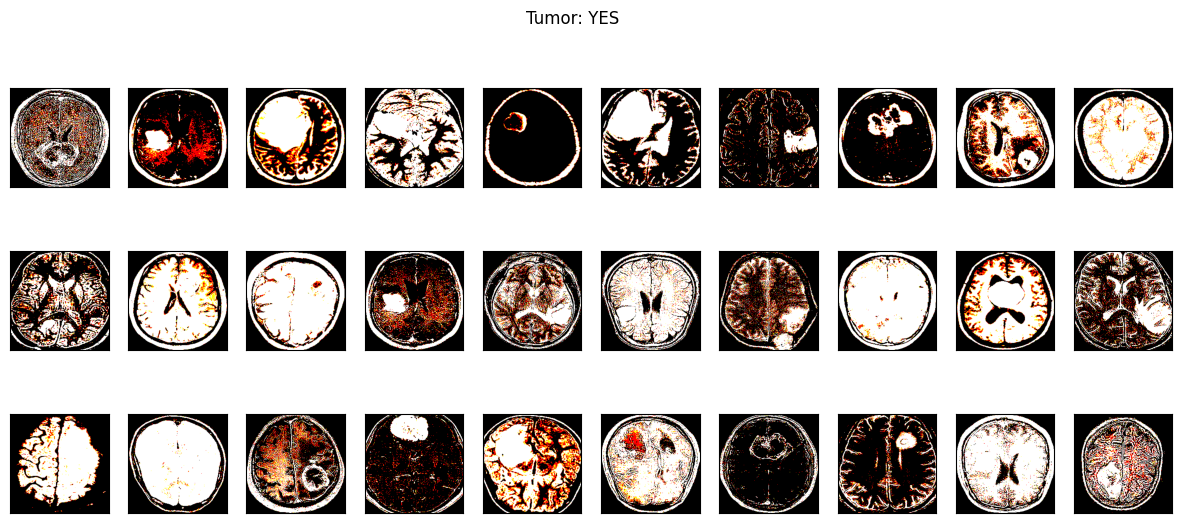

In [ ]:
plot_samples(X_train_prep, y_train, labels, 30)